In [3]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from stldecompose import decompose, forecast             # Decomposition & forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing #ETS Models

import matplotlib.pyplot as plt
%matplotlib inline

### Univariate Time Series

In [4]:
sales_data = pd.read_csv("Tractor-Sales.csv")
sales_data.tail(5)

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [6]:
sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [7]:
date_range_val = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

In [8]:
date_range_val

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [9]:
sales_data.set_index(date_range_val, inplace=True)

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Freq: MS
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [11]:
sales_data.columns = ['Month_Year', 'Tractor_Sales']

In [12]:
sales_data.columns

Index(['Month_Year', 'Tractor_Sales'], dtype='object')

In [13]:
sales_data.head()

,Month_Year,Tractor_Sales
2003-01-01,Jan-03,141
2003-02-01,Feb-03,157
2003-03-01,Mar-03,185
2003-04-01,Apr-03,199
2003-05-01,May-03,203


In [14]:
sales_ts = sales_data.Tractor_Sales

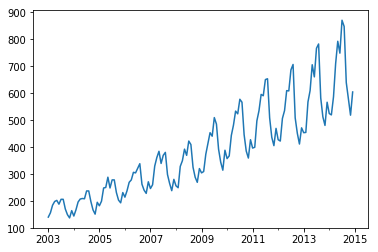

In [15]:
sales_ts.plot()

In [16]:
decompose = seasonal_decompose(sales_ts, model='multiplicative', two_sided=False, extrapolate_trend=4)

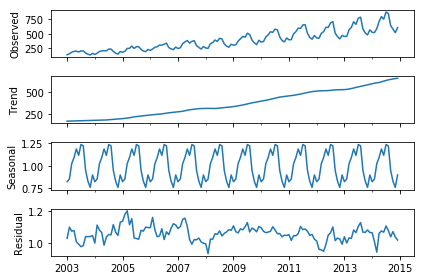

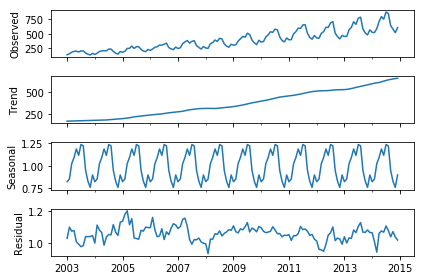

In [17]:
decompose.plot()

In [20]:
decompose.resid

2003-01-01    1.028907
2003-02-01    1.099557
2003-03-01    1.074350
2003-04-01    1.078424
2003-05-01    1.007438
2003-06-01    0.992745
2003-07-01    0.976748
2003-08-01    0.983917
2003-09-01    1.040265
2003-10-01    1.040603
2003-11-01    1.040422
2003-12-01    1.047040
2004-01-01    0.999485
2004-02-01    1.112872
2004-03-01    1.081446
2004-04-01    1.065408
2004-05-01    0.986084
2004-06-01    1.037152
2004-07-01    1.053607
2004-08-01    1.051470
2004-09-01    1.115678
2004-10-01    1.068198
2004-11-01    1.047838
2004-12-01    1.131402
2005-01-01    1.136191
2005-02-01    1.179960
2005-03-01    1.202808
2005-04-01    1.115037
2005-05-01    1.152881
2005-06-01    1.032092
                ...   
2012-07-01    1.064550
2012-08-01    1.100963
2012-09-01    1.014948
2012-10-01    1.031388
2012-11-01    1.024743
2012-12-01    0.992071
2013-01-01    1.039371
2013-02-01    1.000041
2013-03-01    1.032662
2013-04-01    1.029102
2013-05-01    1.081826
2013-06-01    1.065185
2013-07-01 

In [29]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import naive, drift, mean, seasonal_naive

In [25]:
train = sales_ts[:'2014-06-01']
train

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
2003-06-01    189
2003-07-01    207
2003-08-01    207
2003-09-01    171
2003-10-01    150
2003-11-01    138
2003-12-01    165
2004-01-01    145
2004-02-01    168
2004-03-01    197
2004-04-01    208
2004-05-01    210
2004-06-01    209
2004-07-01    238
2004-08-01    238
2004-09-01    199
2004-10-01    168
2004-11-01    152
2004-12-01    196
2005-01-01    183
2005-02-01    200
2005-03-01    249
2005-04-01    251
2005-05-01    289
2005-06-01    249
             ... 
2012-01-01    428
2012-02-01    423
2012-03-01    507
2012-04-01    536
2012-05-01    610
2012-06-01    609
2012-07-01    687
2012-08-01    707
2012-09-01    509
2012-10-01    452
2012-11-01    412
2012-12-01    472
2013-01-01    454
2013-02-01    455
2013-03-01    568
2013-04-01    610
2013-05-01    706
2013-06-01    661
2013-07-01    767
2013-08-01    783
2013-09-01    583
2013-10-01    513
2013-11-01    481
2013-12-01    567
2014-01-01

In [26]:
test = sales_ts['2014-07-01':]

In [30]:
decomp = decompose(train, period=12)

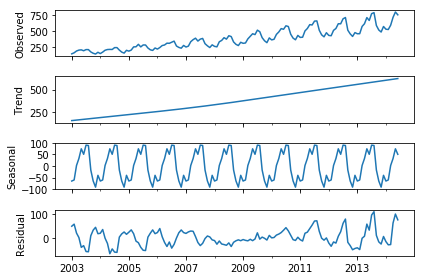

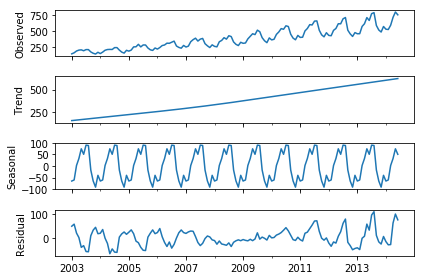

In [31]:
decomp.plot()

In [32]:
fcast = forecast(decomp, steps=6, fc_func =drift ,seasonal=True)

In [33]:
fcast

,drift+seasonal
2014-07-02,716.038863
2014-08-02,718.125634
2014-09-02,616.651714
2014-10-03,573.352222
2014-11-03,550.506493
2014-12-04,605.119672


In [34]:
test

2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor_Sales, dtype: int64

In [35]:
np.mean(np.abs(pd.Series(fcast.values.flat) - pd.Series(test.values.flat))/pd.Series(test.values.flat))

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


0.07360237860400766

In [36]:
#Moving average
sales_ts.rolling(window=4).mean()

2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
2003-06-01    194.00
2003-07-01    199.50
2003-08-01    201.50
2003-09-01    193.50
2003-10-01    183.75
2003-11-01    166.50
2003-12-01    156.00
2004-01-01    149.50
2004-02-01    154.00
2004-03-01    168.75
2004-04-01    179.50
2004-05-01    195.75
2004-06-01    206.00
2004-07-01    216.25
2004-08-01    223.75
2004-09-01    221.00
2004-10-01    210.75
2004-11-01    189.25
2004-12-01    178.75
2005-01-01    174.75
2005-02-01    182.75
2005-03-01    207.00
2005-04-01    220.75
2005-05-01    247.25
2005-06-01    259.50
               ...  
2012-07-01    610.50
2012-08-01    653.25
2012-09-01    628.00
2012-10-01    588.75
2012-11-01    520.00
2012-12-01    461.25
2013-01-01    447.50
2013-02-01    448.25
2013-03-01    487.25
2013-04-01    521.75
2013-05-01    584.75
2013-06-01    636.25
2013-07-01    686.00
2013-08-01    729.25
2013-09-01    698.50
2013-10-01    661.50
2013-11-01   

In [40]:
#ETS Models
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [43]:
# forecast p months ahead
p_ahead = 6
fcast = ets_fit.forecast(p_ahead)

In [44]:
fcast

2014-07-01    839.130119
2014-08-01    843.748265
2014-09-01    649.375963
2014-10-01    569.942381
2014-11-01    528.376084
2014-12-01    624.598404
Freq: MS, dtype: float64

In [45]:
np.mean(np.abs(pd.Series(fcast.values.flat) - pd.Series(test.values.flat))/pd.Series(test.values.flat))

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


0.020957591020092748

In [46]:
#ARIMA Models
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

In [47]:
adfuller(sales_ts)

(1.108825059146738,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [51]:
adfuller(sales_ts.diff(1)[1:])

(-2.5434807731960176,
 0.10525012618273571,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 1067.8217204928187)

In [55]:
adfuller(np.log(sales_ts).diff(2)[2:])

(-3.200721566232408,
 0.019942950105460978,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -434.9038941451596)

In [56]:
ln_sales_ts = np.log(sales_ts)

In [57]:
#d=2
ln_sales_ts_diff2 = ln_sales_ts.diff(2)

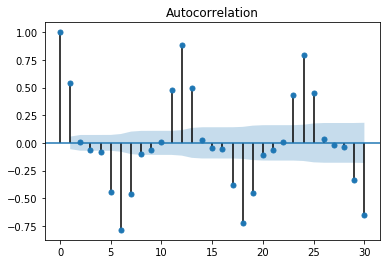

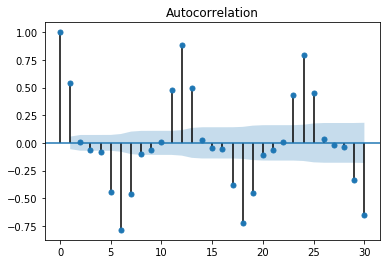

In [58]:
smt.graphics.plot_acf(ln_sales_ts_diff2.dropna(), lags=30,  alpha=0.5)

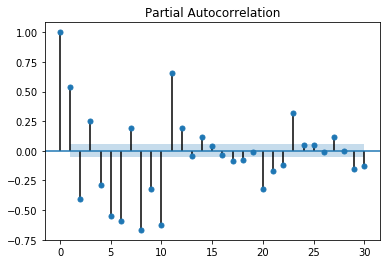

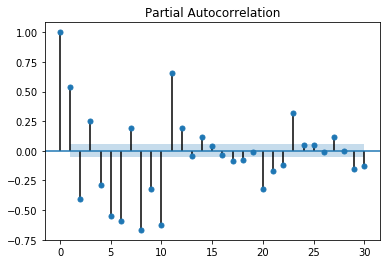

In [59]:
smt.graphics.plot_pacf(ln_sales_ts_diff2.dropna(), lags=30, alpha=0.5, method='ols')

In [ ]:
#Inputs for SARIMA MOdel
#Series: ln_sales_ts
#(p,d,q) = (1,2,1)
#(P,D,Q,T) = (1,0,1, 12)

In [60]:
import statsmodels.api as sm

In [61]:
model = sm.tsa.statespace.SARIMAX(ln_sales_ts, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [62]:
results = model.fit()

In [63]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor_Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 234.891
Date:                            Sun, 08 Sep 2019   AIC                           -459.781
Time:                                    15:53:18   BIC                           -445.521
Sample:                                01-01-2003   HQIC                          -453.987
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3582      0.073     -4.911      0.000      -0.501      -0.215
ma.L1         -1.0000     79.508   

In [64]:
results.forecast(12)

2015-01-01    6.336200
2015-02-01    6.332778
2015-03-01    6.505444
2015-04-01    6.628932
2015-05-01    6.750660
2015-06-01    6.703397
2015-07-01    6.843255
2015-08-01    6.838343
2015-09-01    6.549340
2015-10-01    6.431212
2015-11-01    6.337628
2015-12-01    6.495892
Freq: MS, dtype: float64

In [65]:
np.exp(results.forecast(12))

2015-01-01    564.646680
2015-02-01    562.717591
2015-03-01    668.772712
2015-04-01    756.673832
2015-05-01    854.622737
2015-06-01    815.169881
2015-07-01    937.535543
2015-08-01    932.941661
2015-09-01    698.782954
2015-10-01    620.925929
2015-11-01    565.453491
2015-12-01    662.414594
Freq: MS, dtype: float64

In [66]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [67]:
best_results = auto_arima(ln_sales_ts,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 1), Q=range(0, 3))

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-94.33654573138548
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-179.84996240436456
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-199.4534338328751
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-306.0748598018135
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-330.82169701447106
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-293.42980433139235
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-288.04579142041183
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-296.53709284867637
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-301.6821804006064
SARIMAX(0, 2, 1)x(0, 0, 0, 12)12 - AIC:-164.14045634906932
SARIMAX(0, 2, 1)x(0, 0, 1, 12)12 - AIC:-251.6913236738613
SARIMAX(0, 2, 1)x(0, 0, 2, 12)12 - AIC:-276.38311067637136
SARIMAX(0, 2, 1)x(1, 0, 0, 12)12 - AIC:-424.8156260883315
SARIMAX(0, 2, 1)x(1, 0, 1, 12)12 - AIC:-446.2257537719896
SARIMAX(0, 2, 1)x(1, 0, 2, 12)12 - AIC:-397.60700783213315
SARIMAX(0, 2, 1)x(2, 0, 0, 12)12 - AIC:-402.48292598236276
SARIMAX(0, 2, 1)x(2, 0, 1, 12)12 - AIC:-402.29103989307583
SARI

In [71]:
best_results = sm.tsa.statespace.SARIMAX(ln_sales_ts[:'2014-06-01'], order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [73]:
test = np.exp(ln_sales_ts['2014-07-01':])

In [74]:
test

2014-07-01    871.0
2014-08-01    848.0
2014-09-01    640.0
2014-10-01    581.0
2014-11-01    519.0
2014-12-01    605.0
Freq: MS, Name: Tractor_Sales, dtype: float64

In [75]:
fcast = np.exp(best_results.forecast(6))

In [76]:
np.mean(np.abs(pd.Series(fcast.values.flat) - pd.Series(test.values.flat))/pd.Series(test.values.flat))

0.018284024763594357

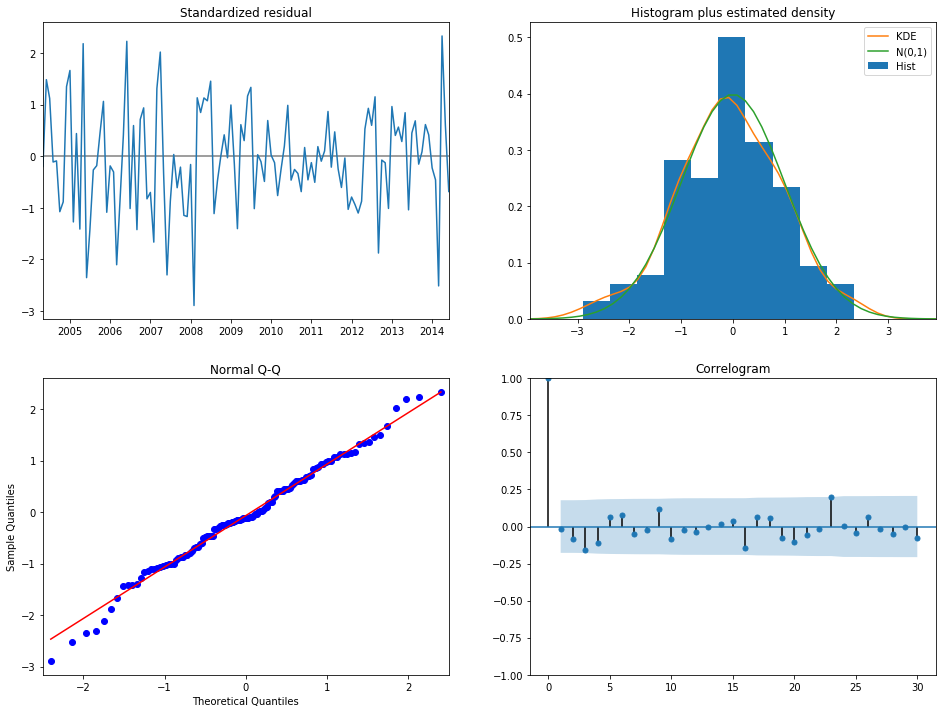

In [77]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

# Multivariate Time Series

In [78]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from stldecompose import decompose, forecast             # Decomposition & forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing #ETS Models

import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
sales_df = pd.read_csv('Sales-and-Marketing.csv')

In [80]:
sales_df.tail()

,Time Period,Sales,Marketing Expense
43,Aug-14,848,784.62
44,Sep-14,640,718.98
45,Oct-14,581,570.30
46,Nov-14,519,527.60
47,Dec-14,605,559.75


In [81]:
data_range = pd.date_range('2011-01-01', freq = 'MS', periods=48)

In [82]:
sales_df.set_index(data_range, inplace=True)

In [83]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Freq: MS
Data columns (total 3 columns):
Time Period          48 non-null object
Sales                48 non-null int64
Marketing Expense    48 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
adfuller(sales_df.Sales.diff(1)[1:])

(-7.015650419745928,
 6.74373103546201e-10,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 361.3167752934367)

In [86]:
#Series sales_df
# d=1
sales_diff = sales_df.Sales.diff(1)[1:]

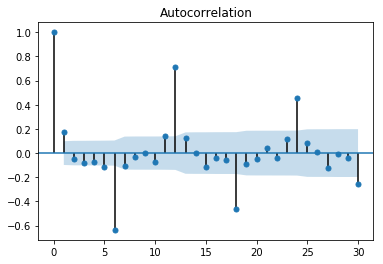

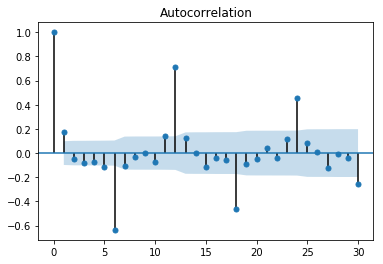

In [87]:
smt.graphics.plot_acf(sales_diff, lags=30,  alpha=0.5)

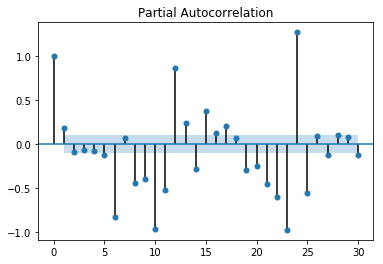

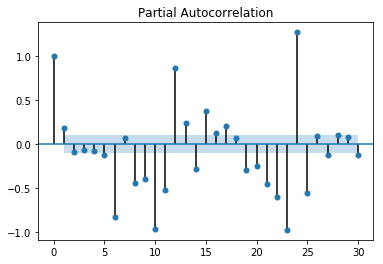

In [88]:
smt.graphics.plot_pacf(sales_diff, lags=30, alpha=0.5, method='ols')

In [ ]:
#based on ACF, PACF p=1, q=1

In [89]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [90]:
best_results = auto_arima(sales_df.Sales,  p=range(0, 3), d=range(1, 2), q=range(0, 3),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:538.5640642571518
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1659.5464704742803
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:327.7228435622519
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1164.9859650006088
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:526.8074933223465
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3298.6263558464098
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:321.40533189985234
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3047.239389366878
SARIMAX(0, 1, 2)x(0, 0, 0, 12)12 - AIC:517.8399167490084
SARIMAX(0, 1, 2)x(0, 0, 1, 12)12 - AIC:2951.499997676241
SARIMAX(0, 1, 2)x(1, 0, 0, 12)12 - AIC:323.36424211644317
SARIMAX(0, 1, 2)x(1, 0, 1, 12)12 - AIC:2968.024652131766
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:539.0686054069412
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1365.7091575193474
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:314.5917057558538
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1388.4608634513966
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:525.6183611340122
SARIMAX(1, 1, 1)x(0, 0, 

In [91]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(sales_df.Sales, order = (2,1,0), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [92]:
print(model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -149.281
Date:                            Sun, 08 Sep 2019   AIC                            306.562
Time:                                    16:10:57   BIC                            312.549
Sample:                                01-01-2011   HQIC                           308.577
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4977      0.206     -2.422      0.015      -0.900      -0.095
ar.L2         -0.1362      0.277   

In [93]:
sales_df.columns = ['Time_period', 'Sales', 'MS']

In [95]:
sales_df.head()

,Time_period,Sales,MS
2011-01-01,Jan-11,397,486.64
2011-02-01,Feb-11,400,501.80
2011-03-01,Mar-11,498,437.09
2011-04-01,Apr-11,536,565.16
2011-05-01,May-11,596,744.15


In [109]:
sales_df['MS_lag1'] = sales_df.MS.shift(1)
sales_df['MS_lag2'] = sales_df.MS.shift(2)
sales_df['MS_lag3'] = sales_df.MS.shift(3)
sales_df['MS_lag4'] = sales_df.MS.shift(4)

In [110]:
sales_df.head(10)

,Time_period,Sales,MS,sales_diff,MS_lag1,MS_lag2,MS_lag3,MS_lag4
2011-05-01,May-11,596,744.15,60.0,NaN,NaN,NaN,NaN
2011-06-01,Jun-11,591,548.74,-5.0,744.15,NaN,NaN,NaN
2011-07-01,Jul-11,651,650.21,60.0,548.74,744.15,NaN,NaN
2011-08-01,Aug-11,654,777.51,3.0,650.21,548.74,744.15,NaN
2011-09-01,Sep-11,509,547.11,-145.0,777.51,650.21,548.74,744.15
2011-10-01,Oct-11,437,382.81,-72.0,547.11,777.51,650.21,548.74
2011-11-01,Nov-11,406,551.56,-31.0,382.81,547.11,777.51,650.21
2011-12-01,Dec-11,470,401.69,64.0,551.56,382.81,547.11,777.51
2012-01-01,Jan-12,428,370.97,-42.0,401.69,551.56,382.81,547.11
2012-02-01,Feb-12,423,318.39,-5.0,370.97,401.69,551.56,382.81


In [111]:
sales_df = sales_df.dropna()

In [112]:
sales_df.head()

,Time_period,Sales,MS,sales_diff,MS_lag1,MS_lag2,MS_lag3,MS_lag4
2011-09-01,Sep-11,509,547.11,-145.0,777.51,650.21,548.74,744.15
2011-10-01,Oct-11,437,382.81,-72.0,547.11,777.51,650.21,548.74
2011-11-01,Nov-11,406,551.56,-31.0,382.81,547.11,777.51,650.21
2011-12-01,Dec-11,470,401.69,64.0,551.56,382.81,547.11,777.51
2012-01-01,Jan-12,428,370.97,-42.0,401.69,551.56,382.81,547.11


In [113]:
sales_df.corr()

,Sales,MS,sales_diff,MS_lag1,MS_lag2,MS_lag3,MS_lag4
Sales,1.000000,0.817288,0.339253,0.594342,0.261719,-0.069414,-0.248237
MS,0.817288,1.000000,0.019529,0.655201,0.421311,0.126969,-0.112573
sales_diff,0.339253,0.019529,1.000000,-0.326850,-0.492891,-0.476443,-0.275186
MS_lag1,0.594342,0.655201,-0.326850,1.000000,0.654443,0.406274,0.157735
MS_lag2,0.261719,0.421311,-0.492891,0.654443,1.000000,0.650695,0.422297
MS_lag3,-0.069414,0.126969,-0.476443,0.406274,0.650695,1.000000,0.644400
MS_lag4,-0.248237,-0.112573,-0.275186,0.157735,0.422297,0.644400,1.000000


In [114]:
X = sales_df[['MS', 'MS_lag1', 'MS_lag2']]
series = sales_df.Sales

In [115]:
best_results = auto_arima(series, regressors=X, p=range(0, 3), d=range(1, 2), q=range(0, 3),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:443.2094358716965
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1103.0730107529473
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:259.8674188122666
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:861.1633836813531
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:428.94030195002745
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1119.157056652529
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:253.44731109934884
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:9956.53397985694
SARIMAX(0, 1, 2)x(0, 0, 0, 12)12 - AIC:416.08545042072836
SARIMAX(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1985.6610914514458
SARIMAX(0, 1, 2)x(1, 0, 0, 12)12 - AIC:253.7574682847557
SARIMAX(0, 1, 2)x(1, 0, 1, 12)12 - AIC:nan
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:444.4330622827519
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1264.3080837902455
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:244.13306582623545
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1145.7807786008148
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:428.3907934132097
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC

In [116]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(series, exog=X, order = (2,1,0), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [117]:
predictions = model.get_prediction(start='2014-01-01', end='2014-12-01')

In [120]:
pred_last1year = predictions.predicted_mean

In [121]:
act_last1year = sales_df.Sales['2014-01-01':]

In [123]:
np.mean(np.abs(pd.Series(pred_last1year.values.flat) - pd.Series(act_last1year.values.flat))/pd.Series(act_last1year.values.flat))

0.022342431382735294

In [124]:
Future_mkt_spend = {
    '2015-01-01' : [600, 559.75, 527.60],
    '2015-02-01' : [550, 600, 559.75],
    '2015-03-01' : [700, 550, 600],
    '2015-04-01' : [590, 700, 550],
    '2015-05-01' : [480, 590, 700],
    '2015-06-01' : [520, 480, 590],
    '2015-07-01' : [800, 520, 480],
    '2015-08-01' : [675, 800, 520],
    '2015-09-01' : [820, 675, 800],
    '2015-10-01' : [710, 820, 675],
    '2015-11-01' : [550, 710, 820],
    '2015-12-01' : [590, 550, 710]
}

Future_mkt_spend = pd.DataFrame(Future_mkt_spend).T
Future_mkt_spend.columns = ['MS', 'MS_lag1', 'MS_lag2']

In [125]:
Future_mkt_spend.head()

,MS,MS_lag1,MS_lag2
2015-01-01,600.0,559.75,527.60
2015-02-01,550.0,600.00,559.75
2015-03-01,700.0,550.00,600.00
2015-04-01,590.0,700.00,550.00
2015-05-01,480.0,590.00,700.00


In [126]:
model.forecast(steps=12, exog=Future_mkt_spend)

2015-01-01     580.227626
2015-02-01     557.879632
2015-03-01     641.605035
2015-04-01     785.799708
2015-05-01     865.532900
2015-06-01     833.005927
2015-07-01    1020.656627
2015-08-01     988.185515
2015-09-01     731.387131
2015-10-01     651.811625
2015-11-01     556.355044
2015-12-01     657.561030
Freq: MS, dtype: float64

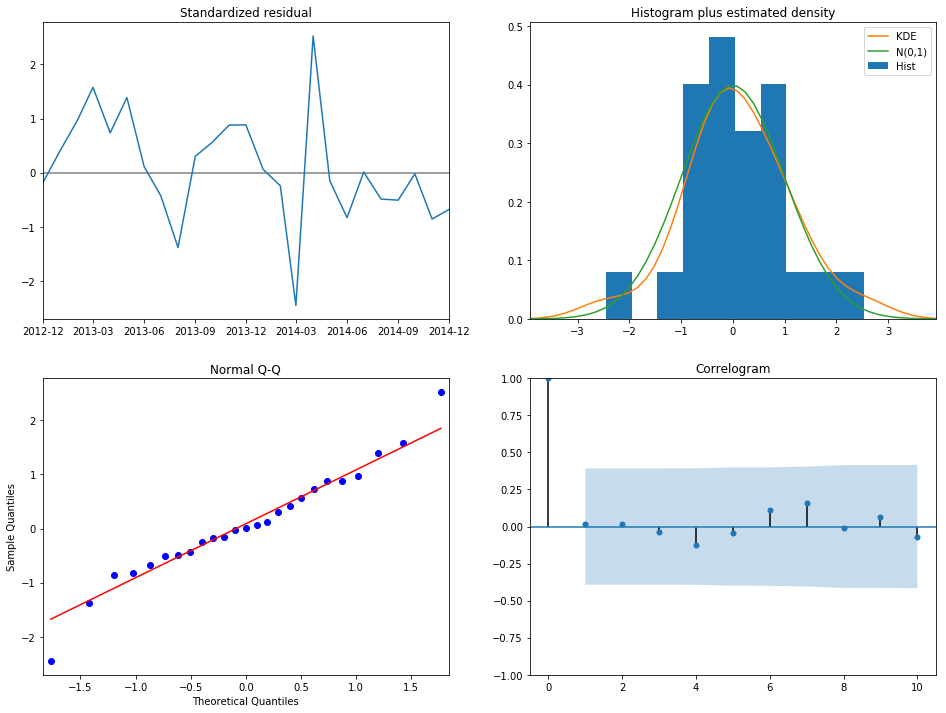

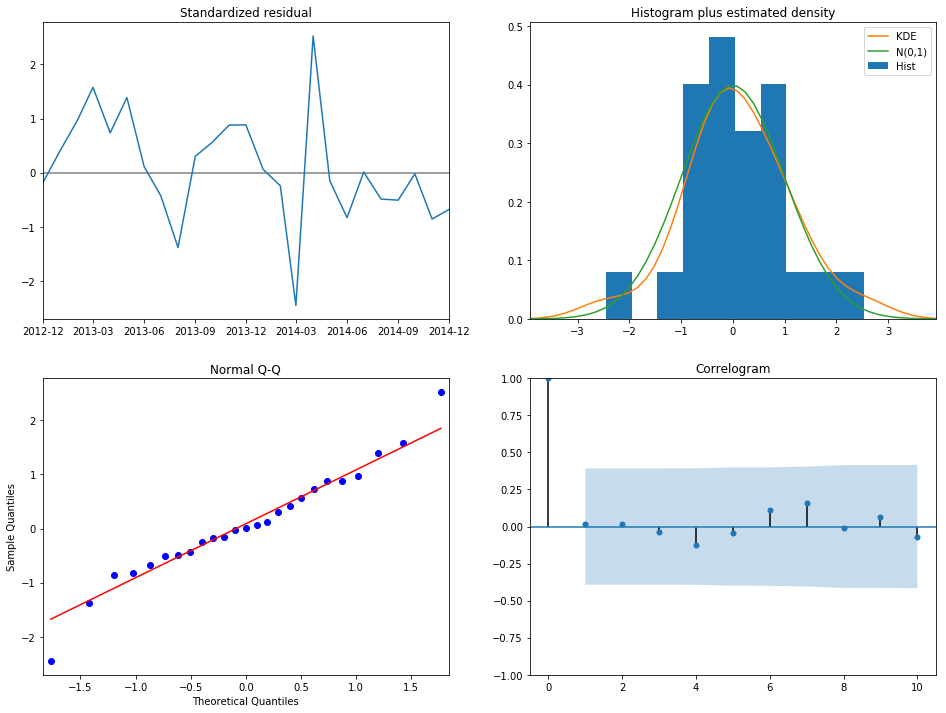

In [131]:
model.plot_diagnostics(figsize=(16,12))